In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [7]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

In [8]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.696087,0.248539,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.437273,0.248309,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.590435,0.160296,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.436957,0.186900,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [11]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weekday_1',
 'hum',
 'mnth_4',
 'holiday',
 'temp',
 'workingday',
 'windspeed',
 'season_2',
 'mnth_2',
 'mnth_7',
 'weekend',
 'mnth_11',
 'weathersit_3',
 'weekday_3',
 'mnth_6',
 'weathersit_2',
 'season_4',
 'weekday_6',
 'mnth_8',
 'weekday_4',
 'weekday_2',
 'mnth_3',
 'mnth_5',
 'mnth_12',
 'mnth_10',
 'weekday_5',
 'yr',
 'season_3',
 'mnth_9']

In [12]:
# Create the dependent variable data
y = df['cnt']

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [13]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(147, 29)
(147,)


In [15]:
num_cols = ['temp','hum', 'windspeed']

scaler = StandardScaler()
scaler.fit(X_train)

# Fit on train numeric columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform test numeric columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [16]:

import joblib
import os

# Path to your existing folder
folder_path = "D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"   # <-- change if needed

# Make sure the folder exists (does NOT create a new one if already exists)
os.makedirs(folder_path, exist_ok=True)

# Full path of the scaler file
scaler_path = os.path.join(folder_path, "scaler.pkl")

# Save scaler
joblib.dump(scaler, scaler_path)

print(f"Scaler saved at: {scaler_path}")


Scaler saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\scaler.pkl


In [17]:
X_train[0:10]

,yr,holiday,workingday,temp,hum,windspeed,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,0,0,1,-0.845148,1.517365,0.490775,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,1,0,1,0.394863,-0.716387,-0.689399,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,1,0,1,0.901725,0.708339,-0.941611,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,1,0,0,0.657344,-0.338640,0.466236,1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,0,0,1,-0.822519,0.568539,-1.088139,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,1,0,1,1.408588,0.223515,0.287420,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,0,0,1,0.773632,2.254877,0.042603,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,0,0,1,-1.492302,1.698804,-0.559073,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,1,0,0,1.014863,-0.145309,-0.152153,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,0,0,1,0.788588,-0.493310,-0.388280,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [18]:
X.columns.tolist()

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'weekend',
 'season_2',
 'season_3',
 'season_4',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

## Lasso


In [19]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [20]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "lasso_model.pkl")

# Save the model
joblib.dump(lasso_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\lasso_model.pkl


In [21]:
lasso_reg.coef_

array([ 1.93585855e+03, -9.60334215e+01,  2.94726431e+02,  8.82512996e+02,
       -2.69293561e+02, -2.45110223e+02,  0.00000000e+00,  8.57046791e+02,
        8.64049162e+02,  1.50830274e+03,  9.80765944e+01,  5.19588273e+02,
        3.16043905e+02,  6.97105702e+02,  2.64947073e+02, -1.63629635e+02,
        2.95534009e+02,  9.32050109e+02,  4.98325672e+02, -1.18283949e+02,
       -4.31965511e+01, -1.34839183e+02, -4.39679617e+01, -1.89490900e+00,
        6.21213067e+01,  7.91339682e+01,  3.89786426e+02, -3.58857219e+02,
       -1.81163215e+03])

In [22]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,1935.858554
holiday,-96.033422
workingday,294.726431
temp,882.512996
hum,-269.293561
windspeed,-245.110223
weekend,0.000000
season_2,857.046791
season_3,864.049162
season_4,1508.302745


In [23]:
lasso_reg.intercept_

np.float64(2360.443163971575)

In [24]:
lasso_reg.score(X_train,y_train)

0.8434381700248669

In [25]:
y_pred_train = lasso_reg.predict(X_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [26]:
MAE= mean_absolute_error(y_test,y_pred_lasso)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred_lasso)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred_lasso)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 597.4800040222376.
 The Mean Squred Error(MSE) is 619726.0537905203.
The Root Mean Squared Error(RMSE) is 787.226812164398.
The R2 Score is 0.8542898559350236.
Adjusted R2 is 0.8181736663804569.


In [27]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [28]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.48,619726.0538,787.2268,0.8543,0.8182


In [29]:
lasso_rg = Lasso()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)


,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [30]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -648201.6155962117


In [31]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [32]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [33]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

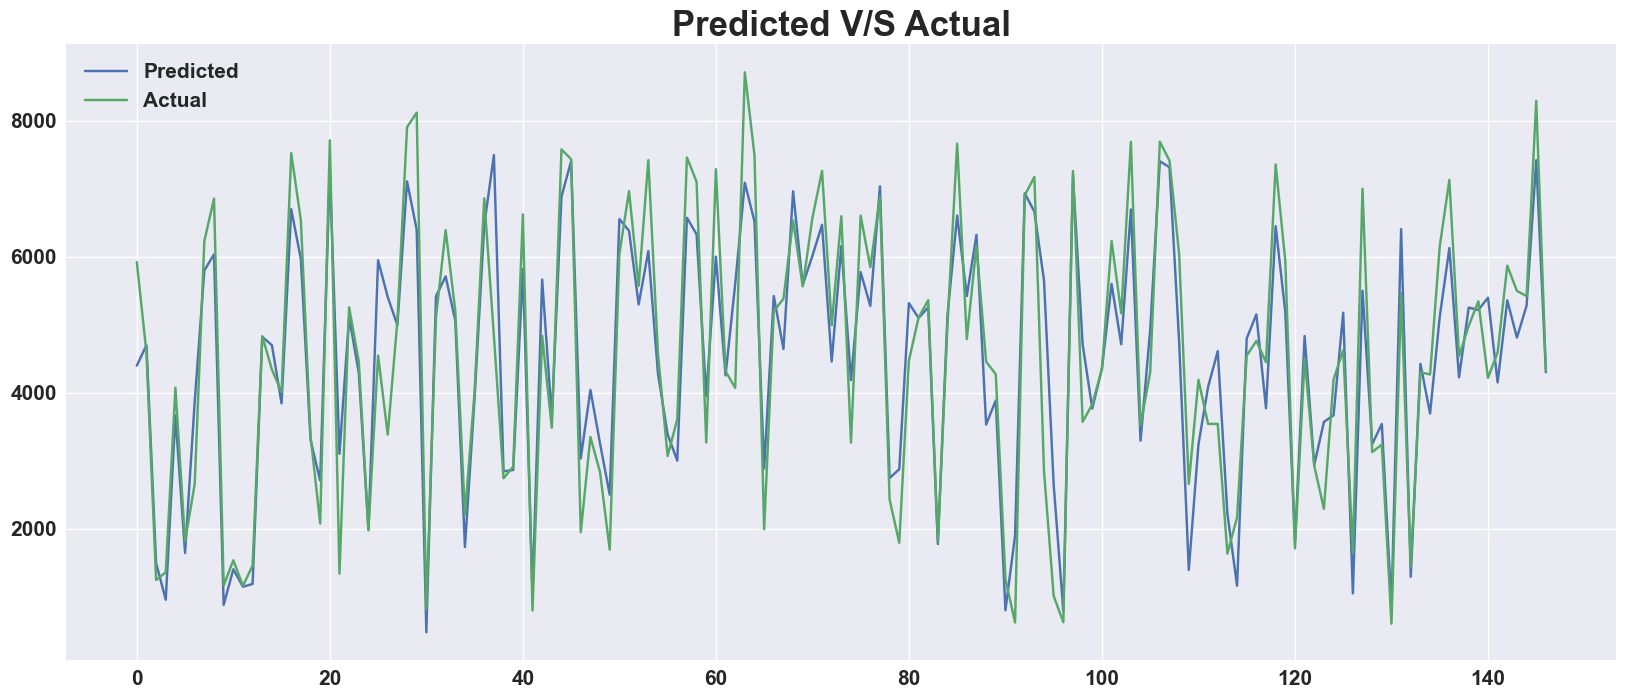

In [34]:
plot_Pred_vs_actual(y_pred_lasso,y_test)

Text(0.5, 0, 'y_predicted')

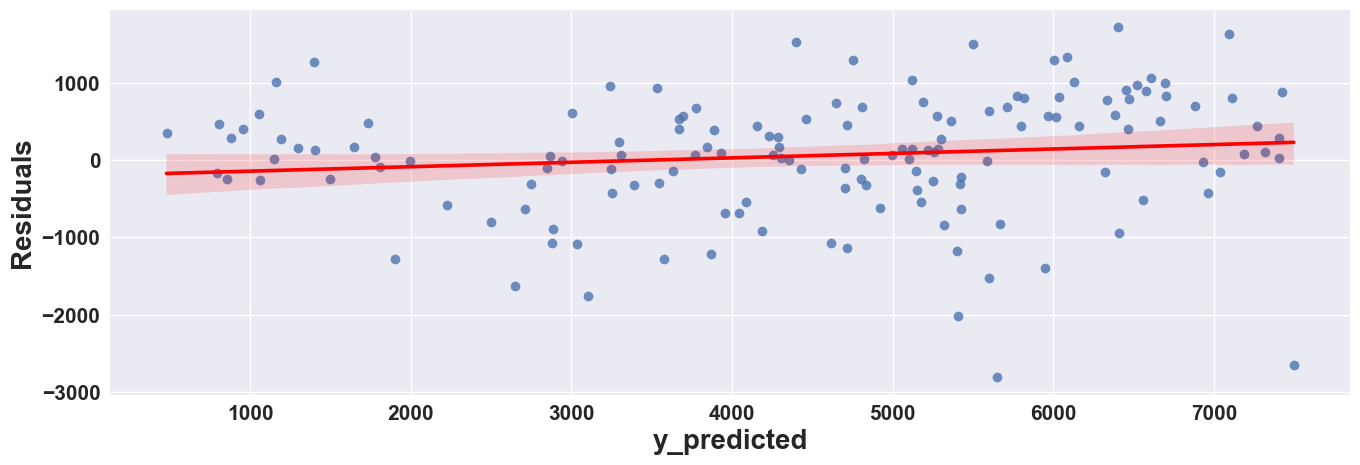

In [35]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred_lasso,y = y_test-y_pred_lasso,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

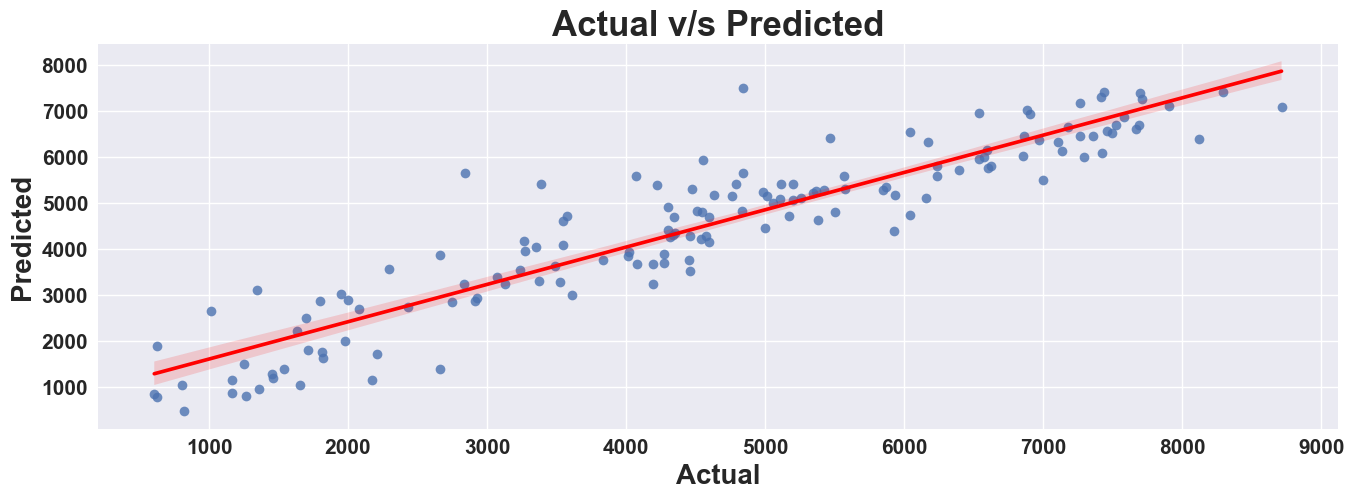

In [36]:
plot_scatter(y_pred_lasso,y_test)

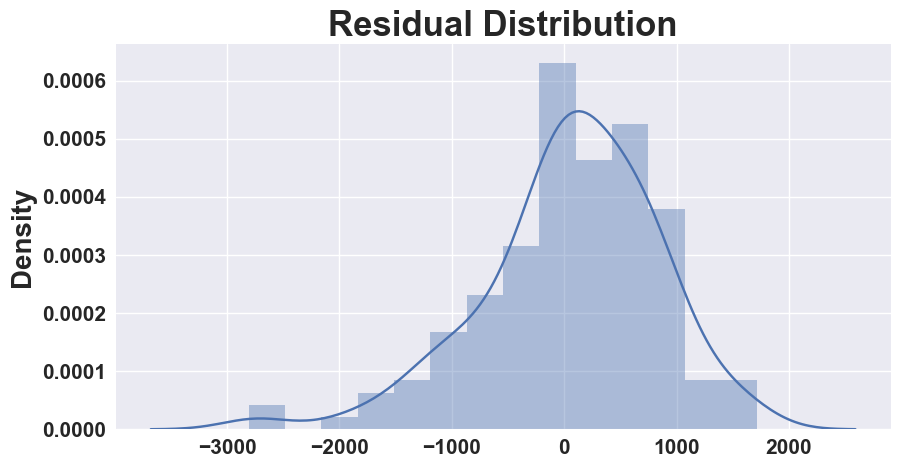

In [37]:
Residual_distPlot(y_pred_lasso,y_test)

# Ridge

In [38]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [39]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [40]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "ridge_model.pkl")

# Save the model
joblib.dump(ridge_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\ridge_model.pkl


In [41]:
# Check coefficient
ridge_reg.coef_

array([ 1935.74733694,  -168.66316803,   222.35535646,   882.62075618,
        -269.40978869,  -245.18305092,   -53.69218844,   856.53851122,
         863.59767843,  1508.09282412,    98.10124231,   519.63039532,
         316.41514736,   697.38104165,   265.1523465 ,  -163.62617648,
         295.74122187,   932.10330854,   498.30783975,  -118.31101516,
         -43.32976843,  -116.21304366,   -25.4120986 ,    16.63760933,
          80.83208906,    97.8476323 ,   389.79260868,  -358.70640345,
       -1810.36186229])

In [42]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,1935.747337
holiday,-168.663168
workingday,222.355356
temp,882.620756
hum,-269.409789
windspeed,-245.183051
weekend,-53.692188
season_2,856.538511
season_3,863.597678
season_4,1508.092824


In [43]:
    # Check intercept
ridge_reg.intercept_

np.float64(2414.3640000515397)

In [44]:
# Checking score
ridge_reg.score(X_train,y_train)

0.8434381545154679

In [45]:
# y predictions on training dataset
y_pred_train = ridge_reg.predict(X_train)
# y predictions on test dataset
y_pred_ridge = ridge_reg.predict(X_test)

In [46]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred_ridge)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_ridge)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred_ridge)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 597.5082519683403.
 The Mean Squred Error(MSE) is 619776.1724283001.
The Root Mean Squared Error(RMSE) is 787.2586439209798.
The R2 Score is 0.8542780720284304.
Adjusted R2 is 0.8181589616765029.


In [47]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [48]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182


In [49]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [50]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -648896.4088466605


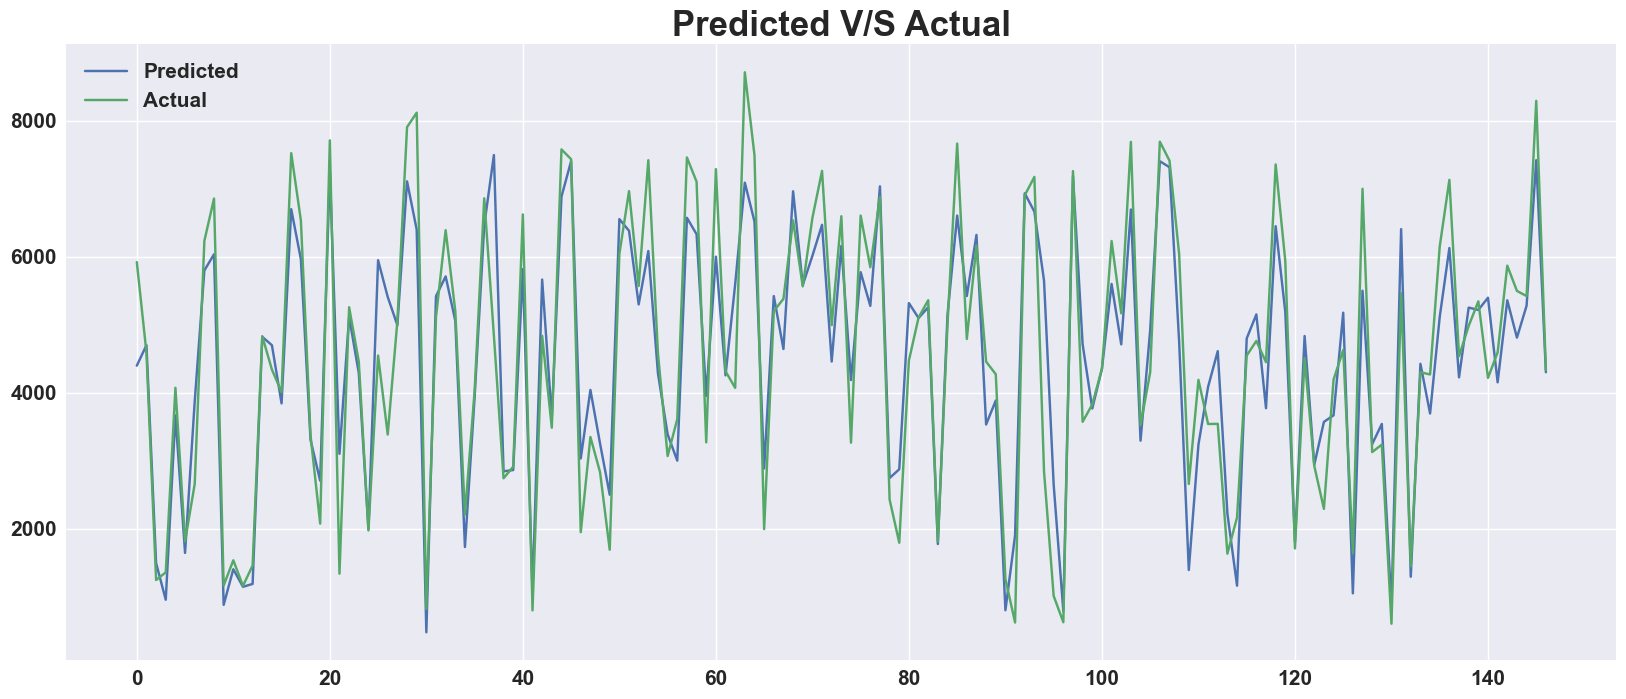

In [51]:
plot_Pred_vs_actual(y_pred_ridge,y_test)

Text(0.5, 0, 'y_predicted')

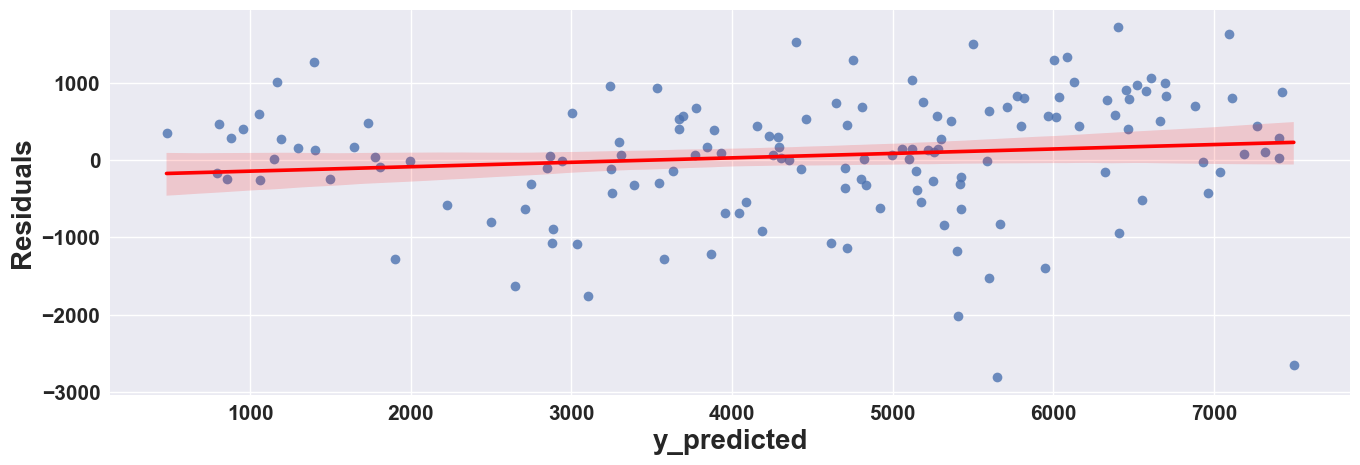

In [52]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_ridge,y=y_test-y_pred_ridge,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

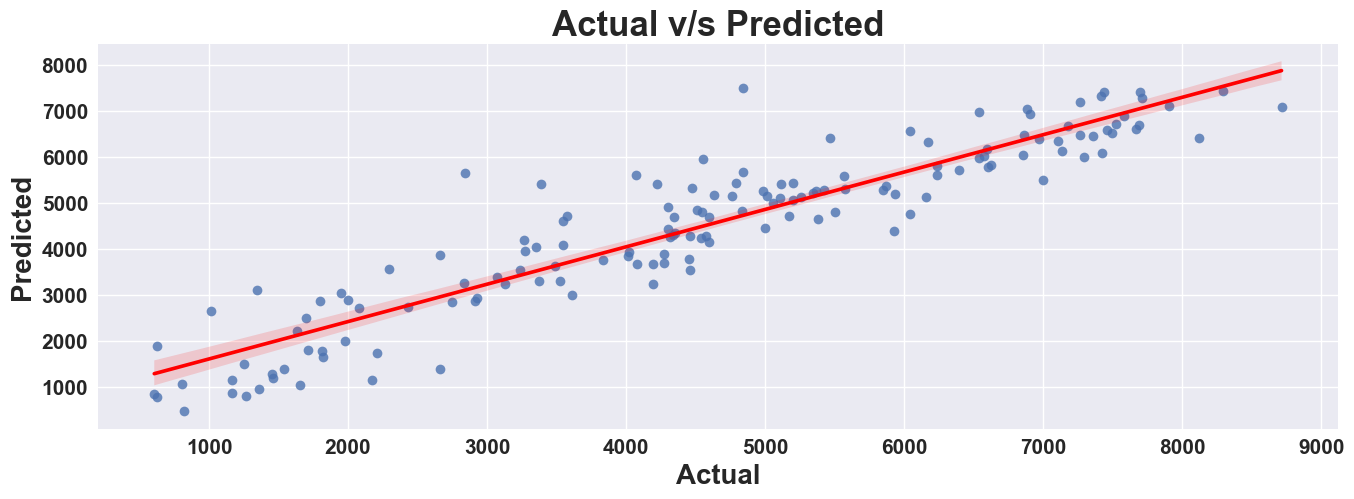

In [53]:
plot_scatter(y_pred_ridge,y_test)

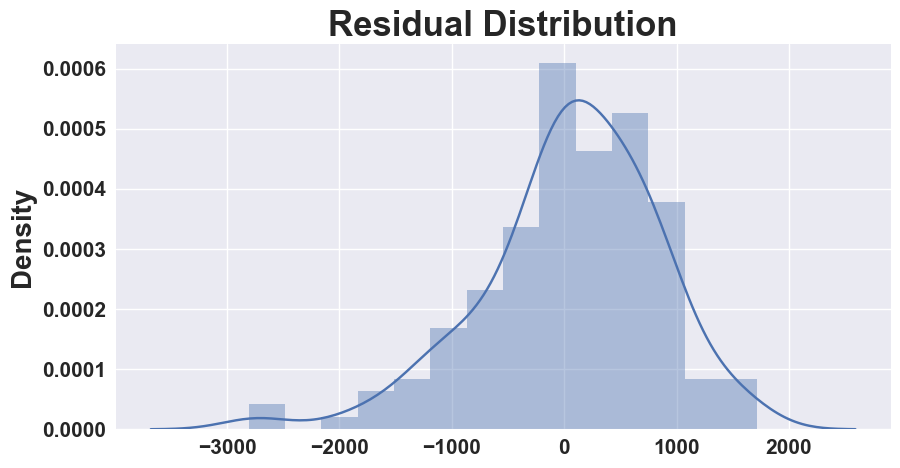

In [54]:
Residual_distPlot(y_pred_ridge,y_test)

# Elastic Net

In [55]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [56]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "elastic_net_model.pkl")

# Save the model
joblib.dump(elastic_net_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\elastic_net_model.pkl


In [57]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred_elastic = elastic_net_reg.predict(X_test)

In [58]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8543008791157565

In [59]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_elastic)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_elastic)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_elastic)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 597.4713133263884.
The Mean Squred Error(MSE) is 619679.1706284751.
The Root Mean Squared Error(RMSE) is 787.1970341842474.
The R2 Score is 0.8543008791157565.
Adjusted R2 is 0.8181874218025679.


In [60]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [61]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182


In [62]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-13, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [63]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.8}
The best negative mean squred error value is -648939.6354013676


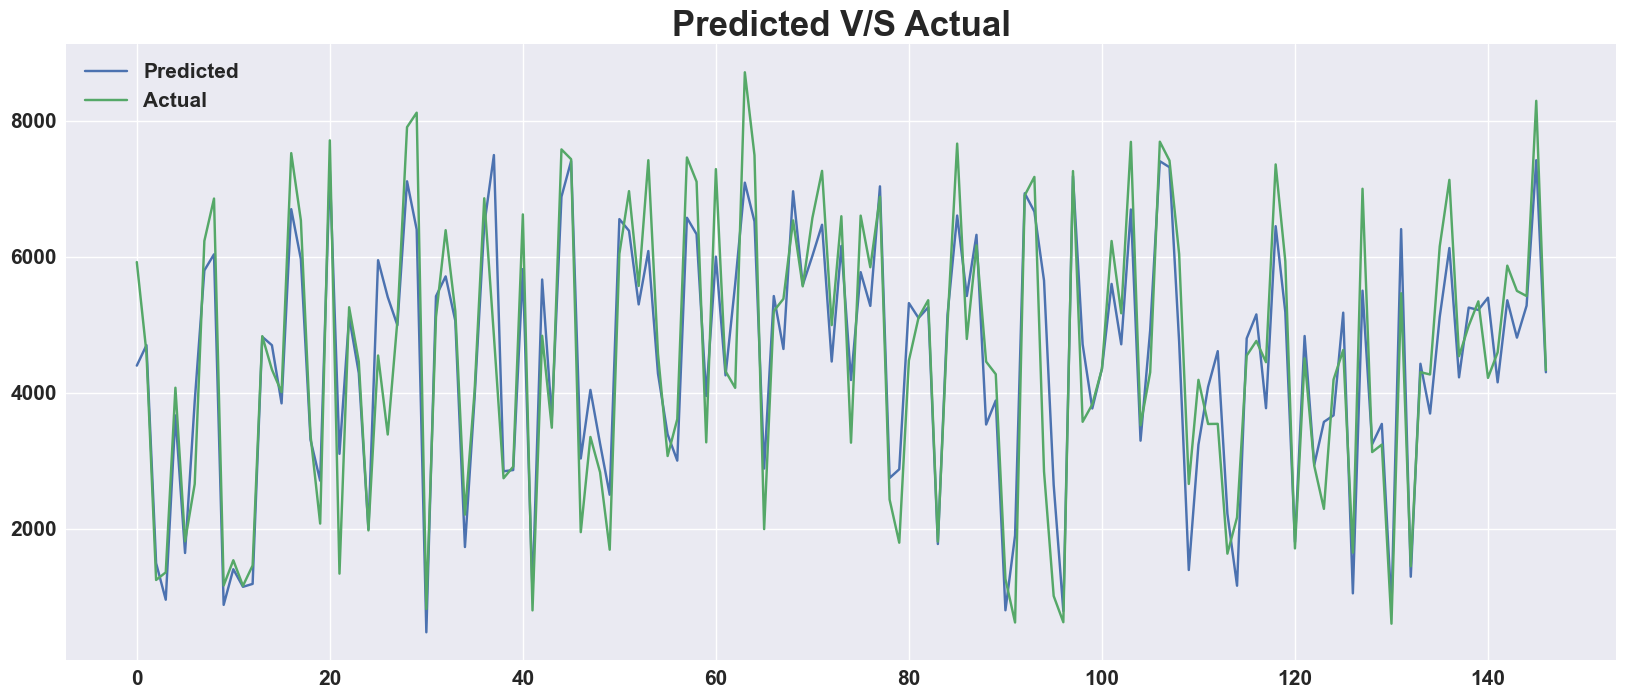

In [64]:
plot_Pred_vs_actual(y_pred_elastic,y_test)

Text(0.5, 0, 'y_predicted')

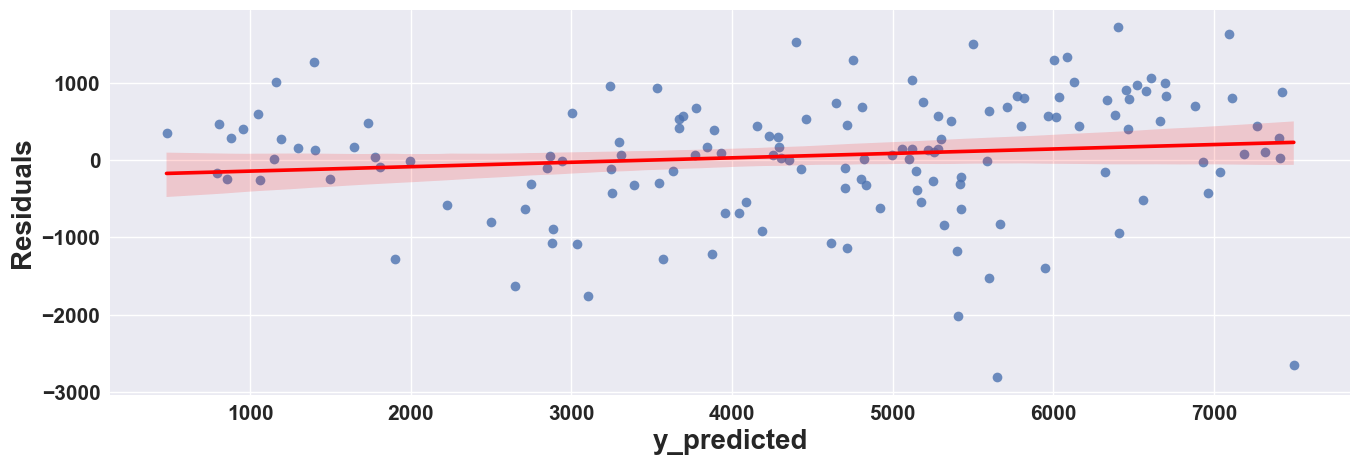

In [65]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_elastic,y=y_test-y_pred_elastic,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

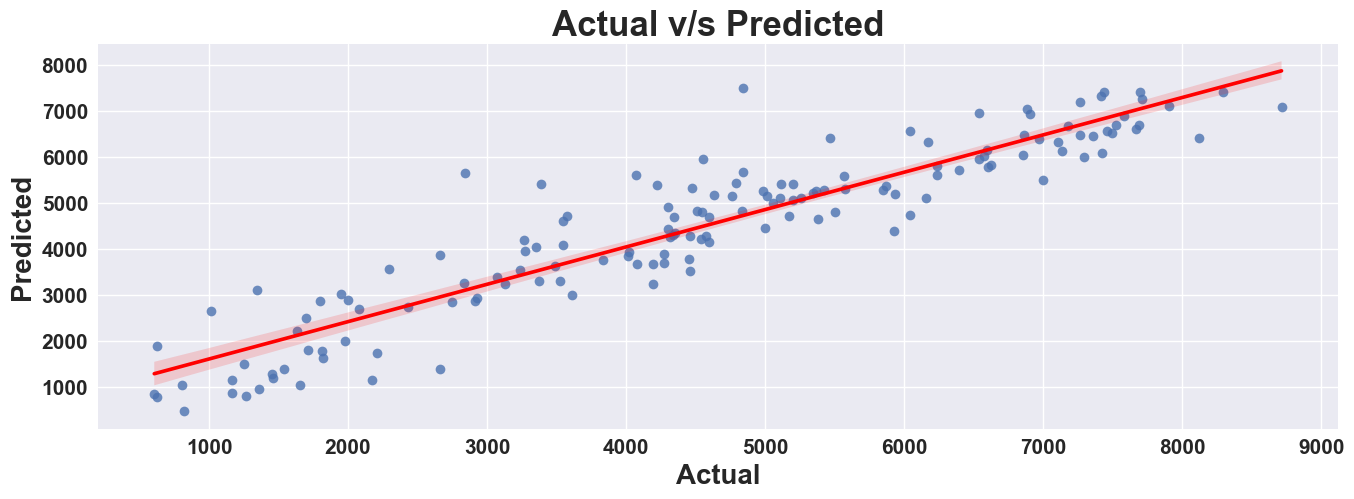

In [66]:
plot_scatter(y_pred_elastic,y_test)

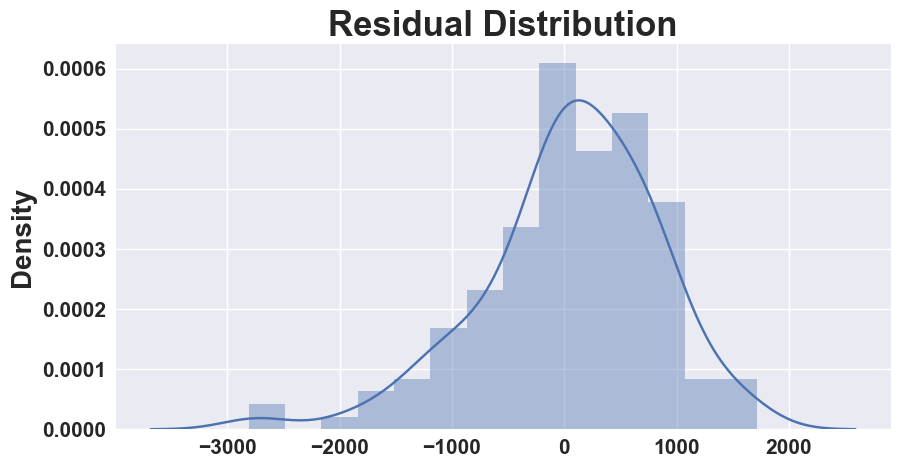

In [67]:
Residual_distPlot(y_pred_elastic,y_test)

### Decision Tree Regressor


In [68]:
D_tree = DecisionTreeRegressor()

D_tree.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [69]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "decision_tree.pkl")

# Save the model
joblib.dump(D_tree,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\decision_tree.pkl


In [70]:
y_pred_train = D_tree.predict(X_train)
y_pred_tree = D_tree.predict(X_test)

In [71]:
MAE = mean_absolute_error(y_test,y_pred_tree)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_tree)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_tree)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_tree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 686.7074829931972.
The Mean Squred Error(MSE) is 863868.9115646258.
The Root Mean Squared Error(RMSE) is 929.4454860639357.
The R2 Score is 0.7968869264291346.
Adjusted R2 is 0.7465426603303731.


In [72]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [73]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182
3,Decision Tree Regressor(GridsearchCV),686.7075,863868.9116,929.4455,0.7969,0.7465


In [74]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [75]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [76]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

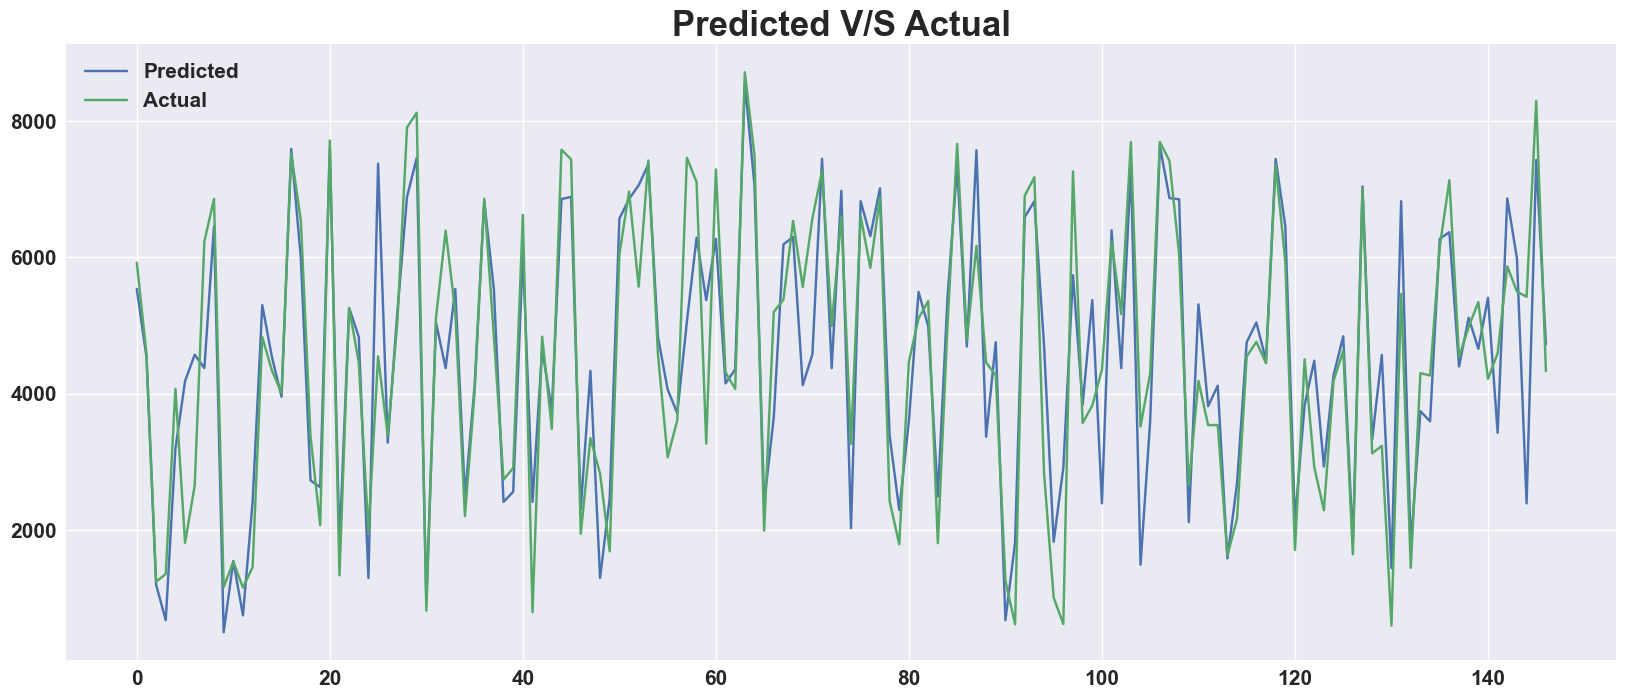

In [77]:
plot_Pred_vs_actual(y_pred_tree,y_test)

Text(0.5, 0, 'y_predicted')

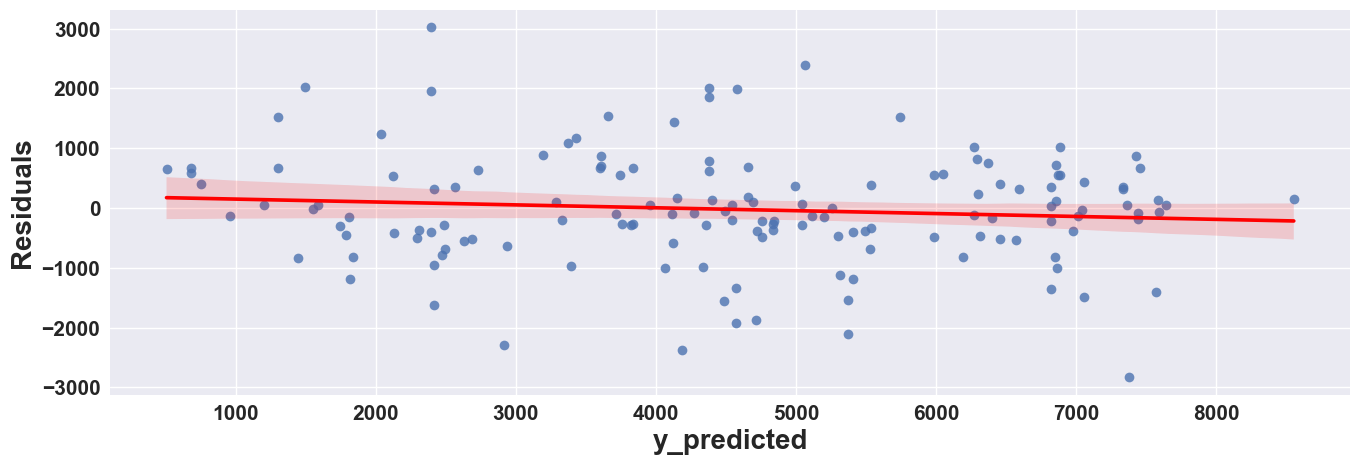

In [78]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_tree,y=y_test-y_pred_tree,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

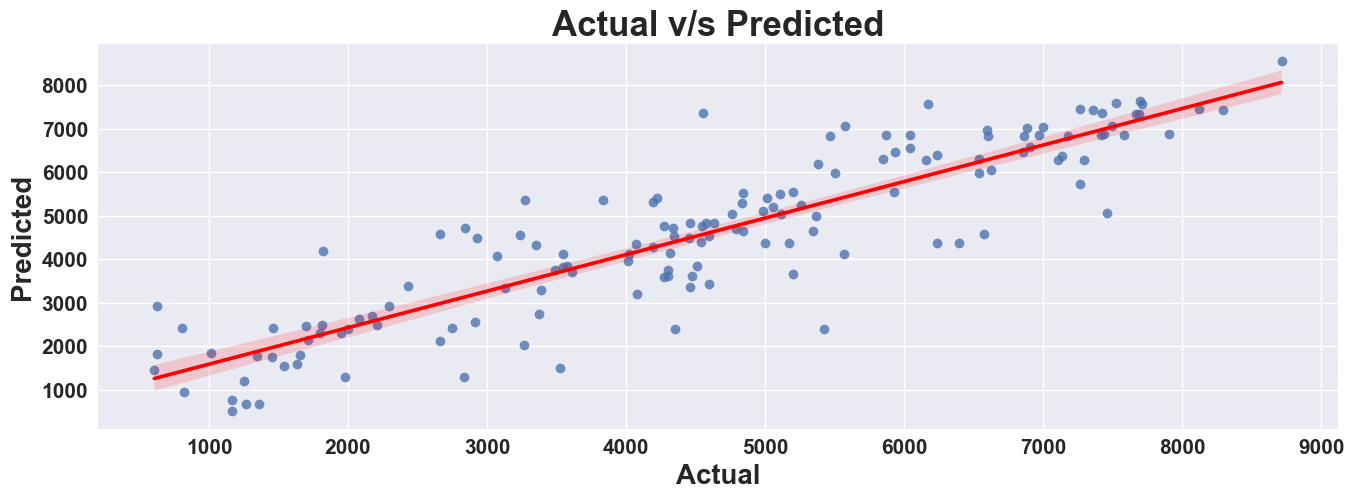

In [79]:
plot_scatter(y_pred_tree,y_test)

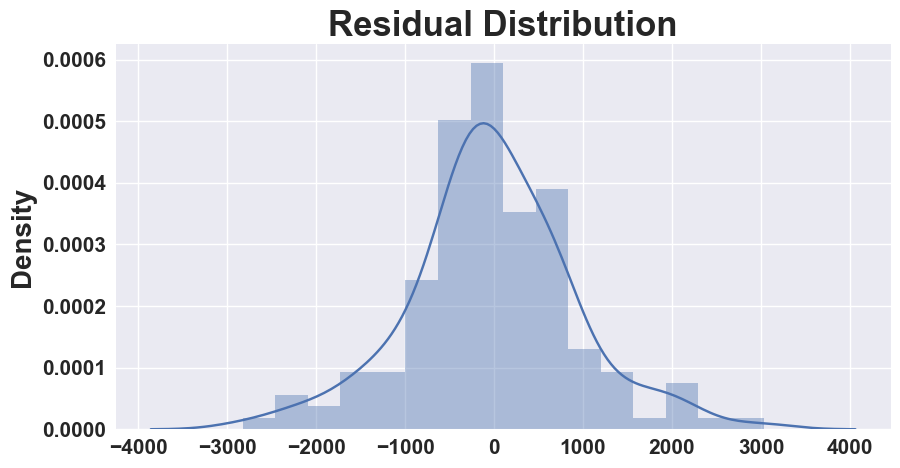

In [80]:
Residual_distPlot(y_pred_tree,y_test)

In [81]:
# Hyper parameters range intialization for tuning 
tree = DecisionTreeRegressor()
parameters=parameters = parameters = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [5, 7, 9],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)

tuning_model = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 7, ...], 'max_features': [None, 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [83]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "decision_tree(CV).pkl")

# Save the model
joblib.dump(tuning_model,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\decision_tree(CV).pkl


In [84]:
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -925311.6719259185


Text(0.5, 0, 'Relative Importance')

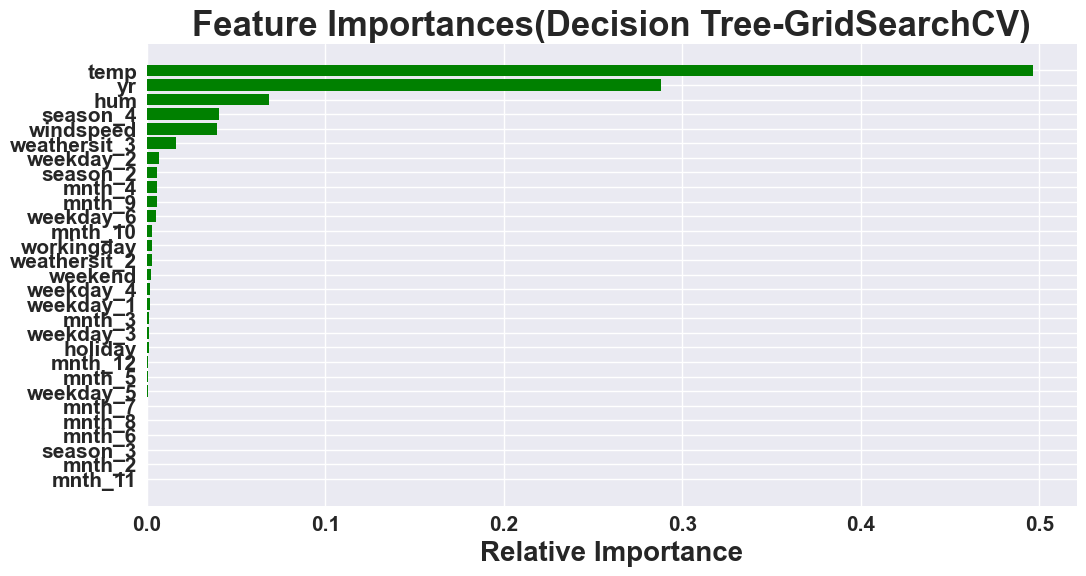

In [85]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Random Forest Regressor

In [86]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "randomforest.pkl")

# Save the model
joblib.dump(rf,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\randomforest.pkl


In [88]:
rf.score(X_test,y_test)

0.8860884845729342

In [89]:
y_pred_train = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

In [90]:
MAE = mean_absolute_error(y_test,y_pred_rf)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_rf)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_rf)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 514.9901360544217.
The Mean Squred Error(MSE) is 484481.94454761903.
The Root Mean Squared Error(RMSE) is 696.0473723444541.
The R2 Score is 0.8860884845729342.
Adjusted R2 is 0.8578540063901572.


In [91]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [92]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182
3,Decision Tree Regressor(GridsearchCV),686.7075,863868.9116,929.4455,0.7969,0.7465
4,Random Forest Regressor,514.9901,484481.9445,696.0474,0.8861,0.8579


### GridSearchCV On Random Forest

In [93]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [94]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,80


In [95]:
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 8, 'n_estimators': 80}
The best negative mean squred error value is -527335.5028198998


In [96]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

,n_estimators,80
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [97]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "randomforest(CV).pkl")

# Save the model
joblib.dump(rf_rg,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\randomforest(CV).pkl


In [98]:
rf_rg.score(X_test,y_test)

0.8833460013726513

In [99]:
y_pred_train = rf_rg.predict(X_train)
y_pred_rf_rg = rf_rg.predict(X_test)

In [100]:
MAE = mean_absolute_error(y_test,y_pred_rf_rg)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_rf_rg)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_rf_rg)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_rf_rg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 517.9705869292134.
The Mean Squred Error(MSE) is 496146.1172941658.
The Root Mean Squared Error(RMSE) is 704.3764031355436.
The R2 Score is 0.8833460013726513.
Adjusted R2 is 0.8544317623966418.


In [101]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [102]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182
3,Decision Tree Regressor(GridsearchCV),686.7075,863868.9116,929.4455,0.7969,0.7465
4,Random Forest Regressor,514.9901,484481.9445,696.0474,0.8861,0.8579
5,Random Forest Regressor(GridsearchCV),517.9706,496146.1173,704.3764,0.8833,0.8544


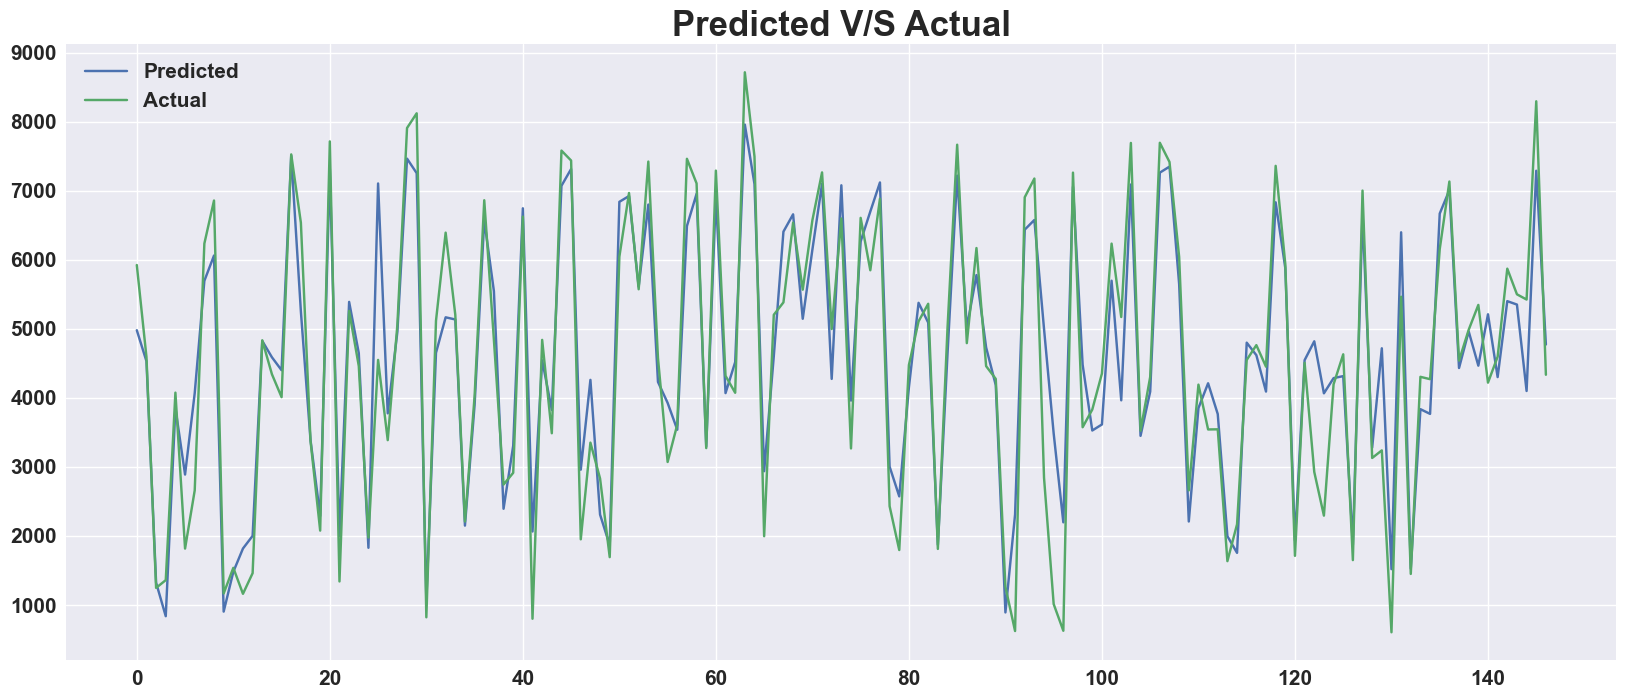

In [103]:
plot_Pred_vs_actual(y_pred_rf_rg,y_test)

Text(0.5, 0, 'y_predicted')

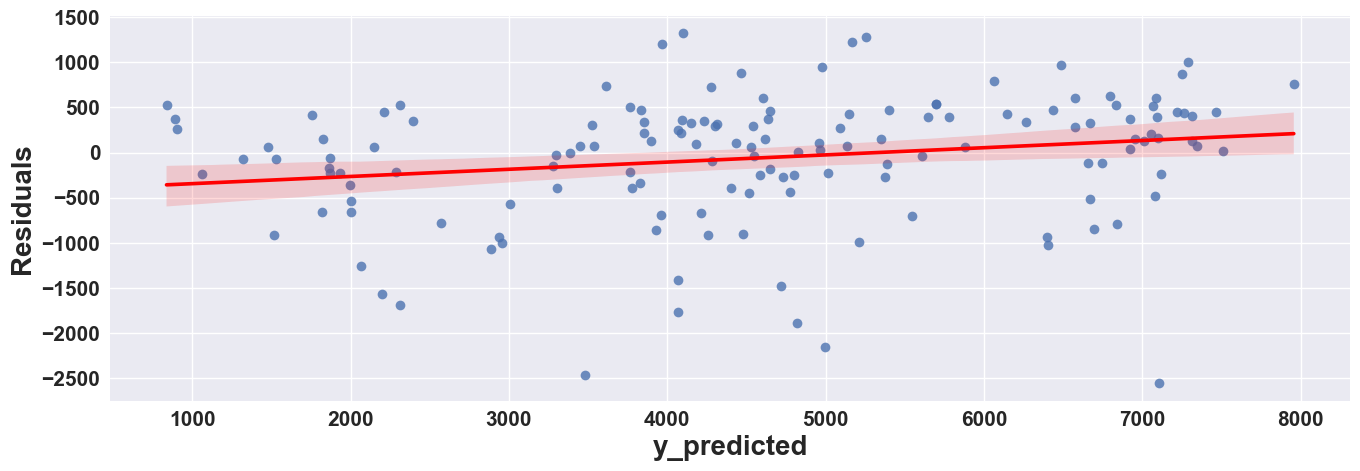

In [104]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_rf_rg,y=y_test-y_pred_rf_rg,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

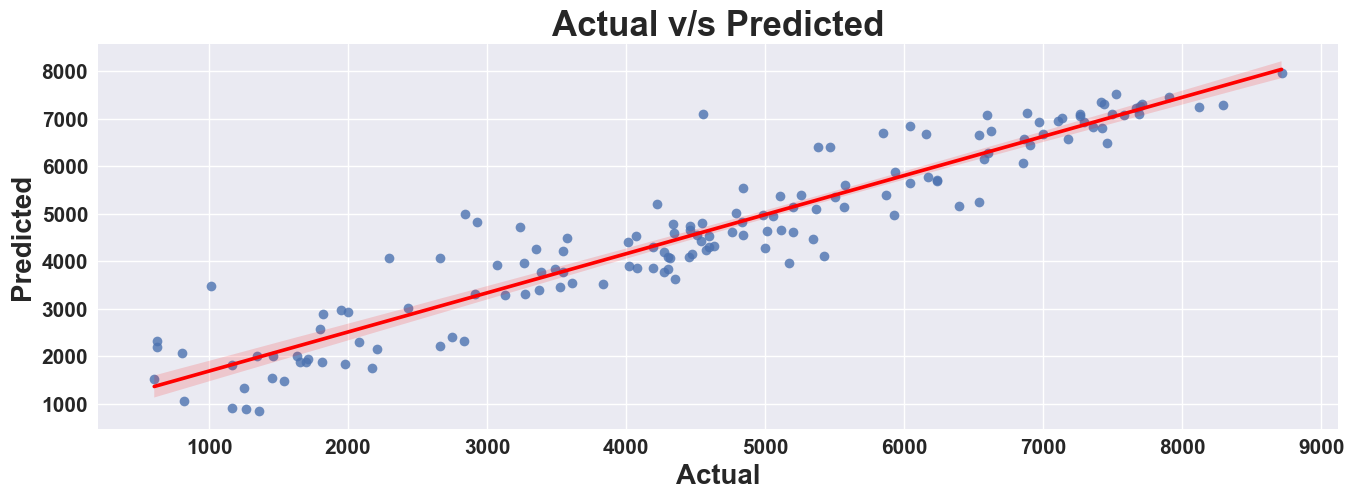

In [105]:
plot_scatter(y_pred_rf_rg,y_test)

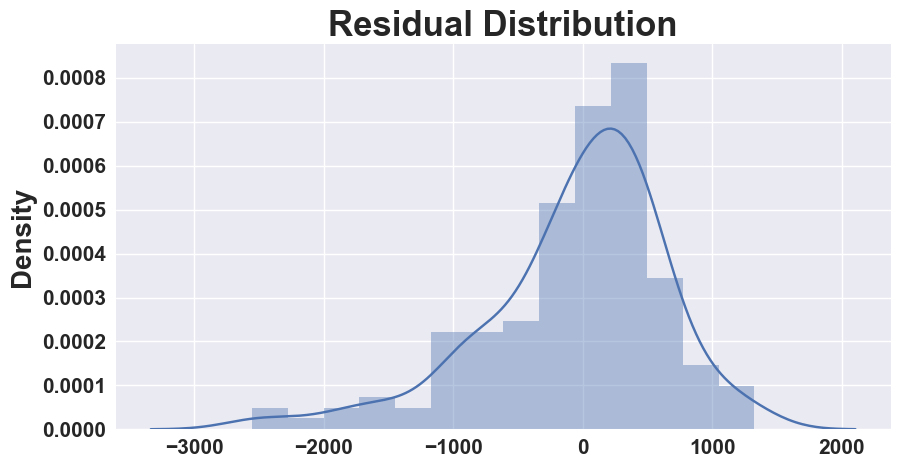

In [106]:
Residual_distPlot(y_pred_rf_rg,y_test)

Text(0.5, 0, 'Relative Importance')

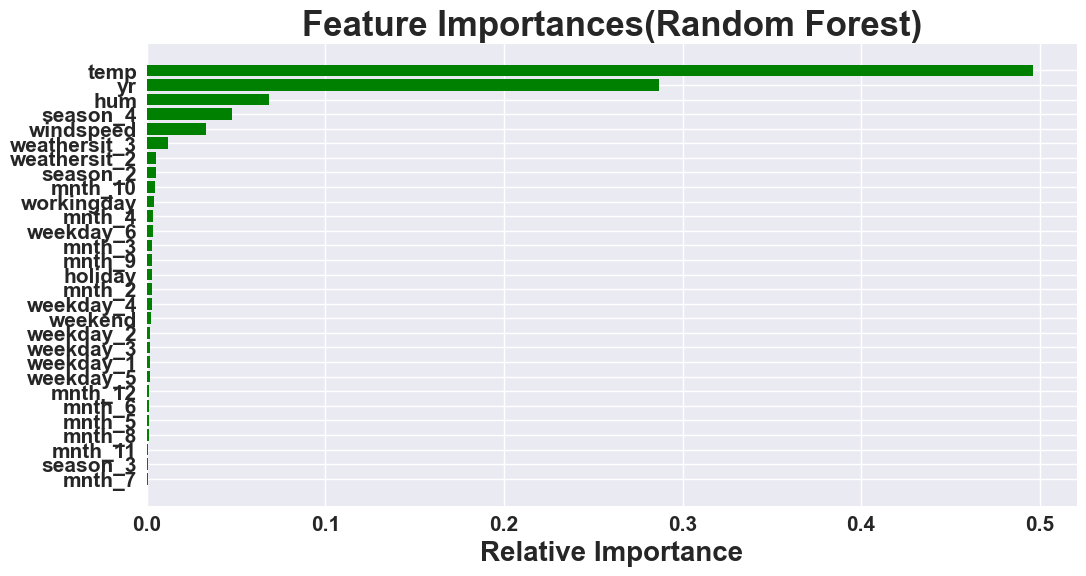

In [107]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Gradient Boosting

In [108]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [109]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "gradient_boost.pkl")

# Save the model
joblib.dump(gradboo_reg,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\gradient_boost.pkl


In [110]:
gradboo_reg.score(X_test,y_test)

0.8754235595174047

In [111]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred_grad = gradboo_reg.predict(X_test)

In [112]:
MAE = mean_absolute_error(y_test,y_pred_grad)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_grad)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_grad)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_grad))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 524.6125035586803.
The Mean Squred Error(MSE) is 529841.3940289647.
The Root Mean Squared Error(RMSE) is 727.9020497491161.
The R2 Score is 0.8754235595174047.
Adjusted R2 is 0.844545638372146.


In [113]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [114]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182
3,Decision Tree Regressor(GridsearchCV),686.7075,863868.9116,929.4455,0.7969,0.7465
4,Random Forest Regressor,514.9901,484481.9445,696.0474,0.8861,0.8579
5,Random Forest Regressor(GridsearchCV),517.9706,496146.1173,704.3764,0.8833,0.8544
6,Gardient boosting Regression,524.6125,529841.3940,727.9020,0.8754,0.8445


### GridSearchCV on Gradient Boosting Regressor

In [115]:
gbr = GradientBoostingRegressor()

In [116]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [117]:
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
grad_boo_tuning.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [4, 6, ...], 'n_estimators': [50, 80, ...], 'subsample': [0.9, 0.5, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [118]:
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8819683287198223


In [119]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.04
,n_estimators,150
,subsample,0.5
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


In [120]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "gradient_boost(CV).pkl")

# Save the model
joblib.dump(grad_tuned,file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\gradient_boost(CV).pkl


In [121]:
grad_tuned.score(X_test,y_test)

0.9015999653537933

In [122]:
y_pred_train = grad_tuned.predict(X_train)
y_pred_tuned = grad_tuned.predict(X_test)

In [123]:
MAE = mean_absolute_error(y_test,y_pred_tuned)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred_tuned)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred_tuned)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_tuned))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 470.79254974735886.
The Mean Squred Error(MSE) is 418509.4013560987.
The Root Mean Squared Error(RMSE) is 646.9230258354534.
The R2 Score is 0.9015999653537933.
Adjusted R2 is 0.8772102131765284.


In [124]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [125]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182
3,Decision Tree Regressor(GridsearchCV),686.7075,863868.9116,929.4455,0.7969,0.7465
4,Random Forest Regressor,514.9901,484481.9445,696.0474,0.8861,0.8579
5,Random Forest Regressor(GridsearchCV),517.9706,496146.1173,704.3764,0.8833,0.8544
6,Gardient boosting Regression,524.6125,529841.3940,727.9020,0.8754,0.8445
7,Gradient Boosting Regression(GridSearchCV),470.7925,418509.4014,646.9230,0.9016,0.8772


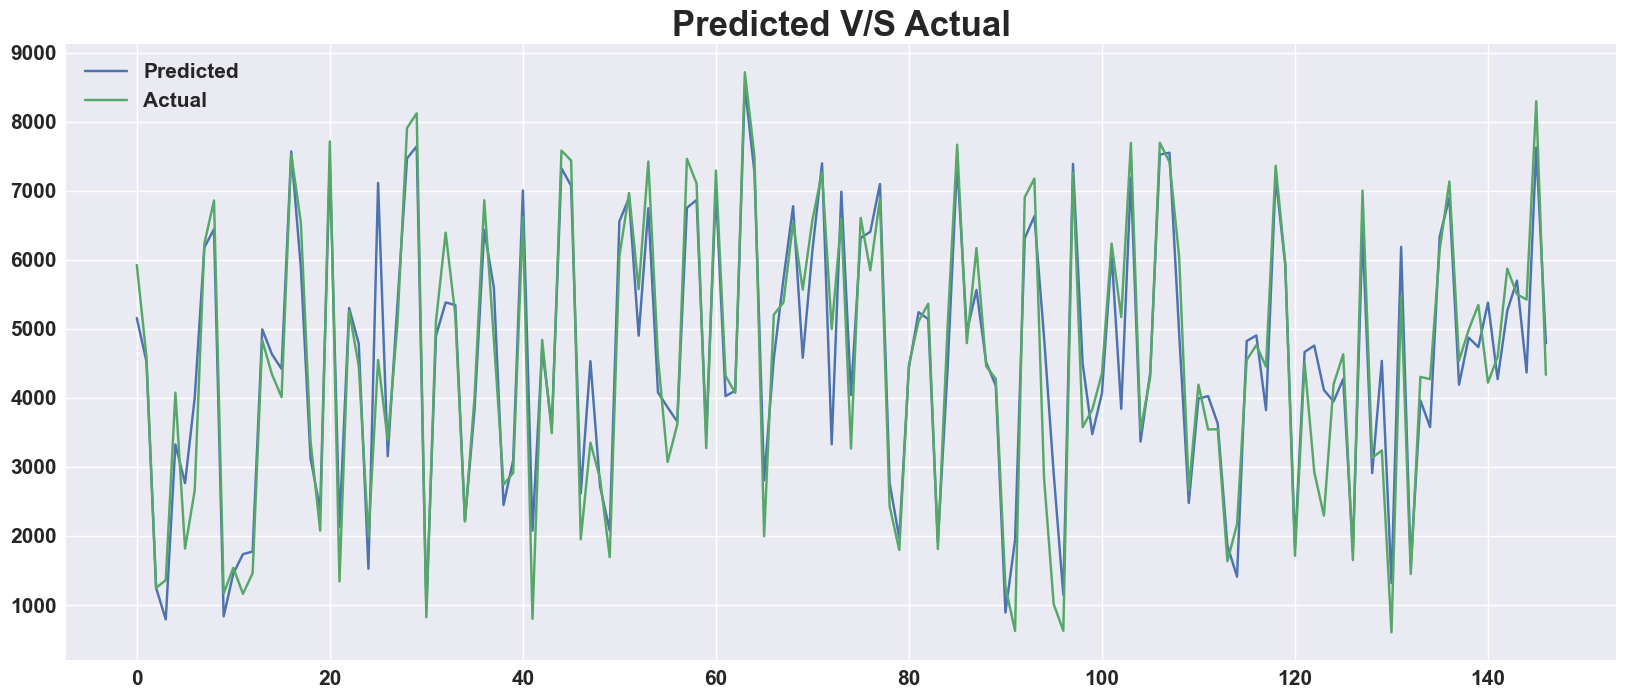

In [126]:
plot_Pred_vs_actual(y_pred_tuned,y_test)

Text(0.5, 0, 'y_predicted')

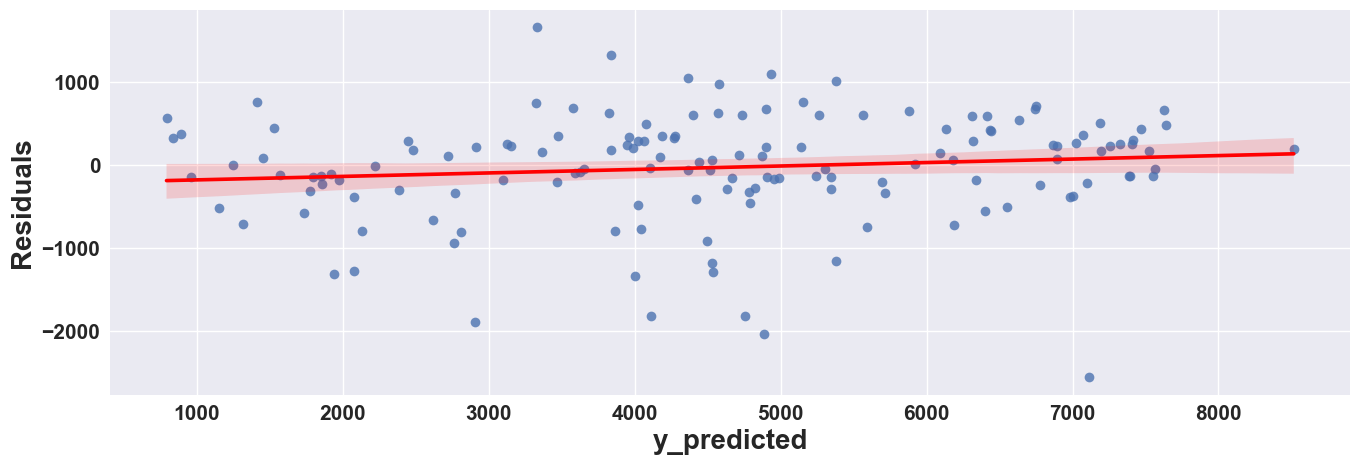

In [127]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_tuned,y=y_test-y_pred_tuned,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

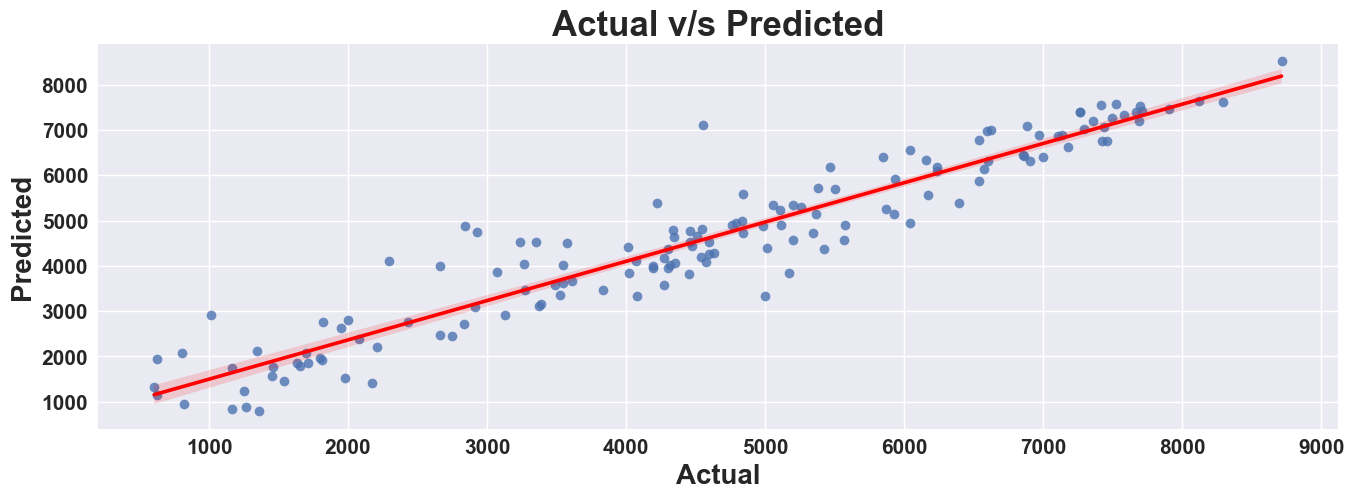

In [128]:
plot_scatter(y_pred_tuned,y_test)

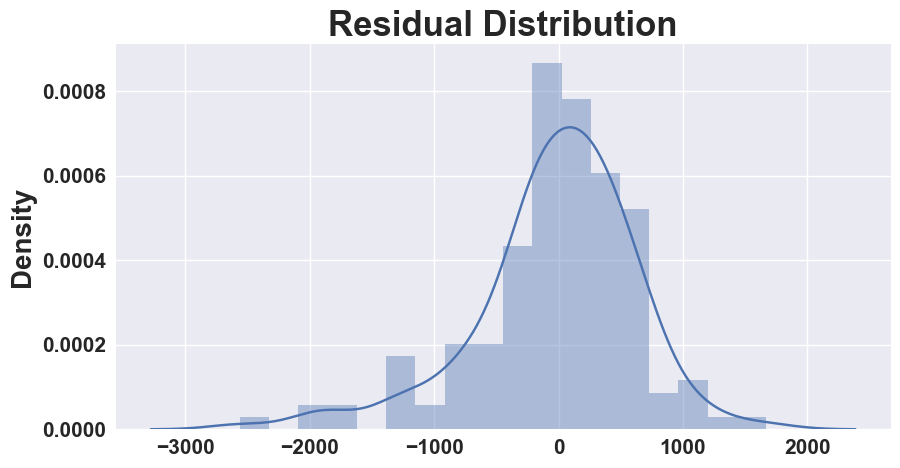

In [129]:
Residual_distPlot(y_pred_tuned,y_test)

Text(0.5, 0, 'Relative Importance')

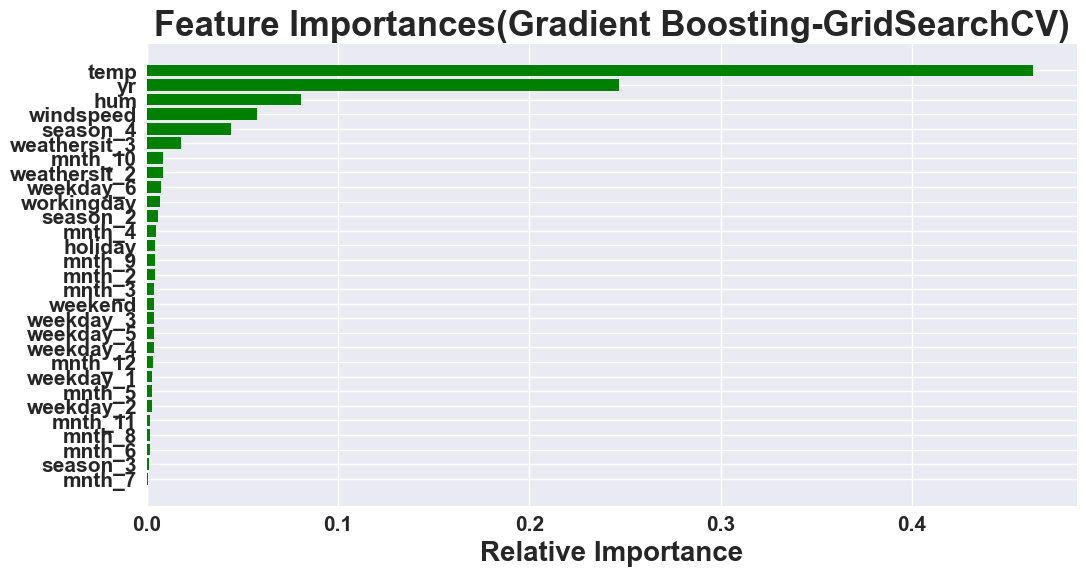

In [130]:
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Final Comaparison : -

In [131]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,597.4800,619726.0538,787.2268,0.8543,0.8182
1,Ridge(GridsearchCv Tunned),597.5083,619776.1724,787.2586,0.8543,0.8182
2,ElasticNet(GridSearchCV-Tunned),597.4713,619679.1706,787.1970,0.8543,0.8182
3,Decision Tree Regressor(GridsearchCV),686.7075,863868.9116,929.4455,0.7969,0.7465
4,Random Forest Regressor,514.9901,484481.9445,696.0474,0.8861,0.8579
5,Random Forest Regressor(GridsearchCV),517.9706,496146.1173,704.3764,0.8833,0.8544
6,Gardient boosting Regression,524.6125,529841.3940,727.9020,0.8754,0.8445
7,Gradient Boosting Regression(GridSearchCV),470.7925,418509.4014,646.9230,0.9016,0.8772
8,Gradient Boosting Regression(GridSearchCV),470.7925,418509.4014,646.9230,0.9016,0.8772


In [132]:
save_dir =r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling"
def plot_r2(test_results_df, save_dir="plots"):


    df = test_results_df.sort_values(by="R2_score", ascending=False)

    # Apply a darker theme
    plt.style.use("dark_background")

    plt.figure(figsize=(10, 6))
    
    # Custom color gradient
    colors = plt.cm.cividis(np.linspace(0.3, 1, len(df)))

    plt.barh(df["Model"], df["R2_score"], color=colors)

    plt.xlabel("R² Score", fontsize=12, color="white")
    plt.ylabel("Models", fontsize=12, color="white")
    plt.title("Model Comparison by R² Score", fontsize=15, fontweight="bold", color="yellow")

    # Reverse y-axis so best model appears on top
    plt.gca().invert_yaxis()

    plt.grid(axis="x", linestyle="--", alpha=0.3, color="white")

    plt.tight_layout()

    # Save inside chosen directory
    file_path = os.path.join(save_dir, "R2_Score_Comparison.png")
    plt.savefig(file_path, dpi=300)

    plt.show()
    print(f"Saved plot at: {file_path}")


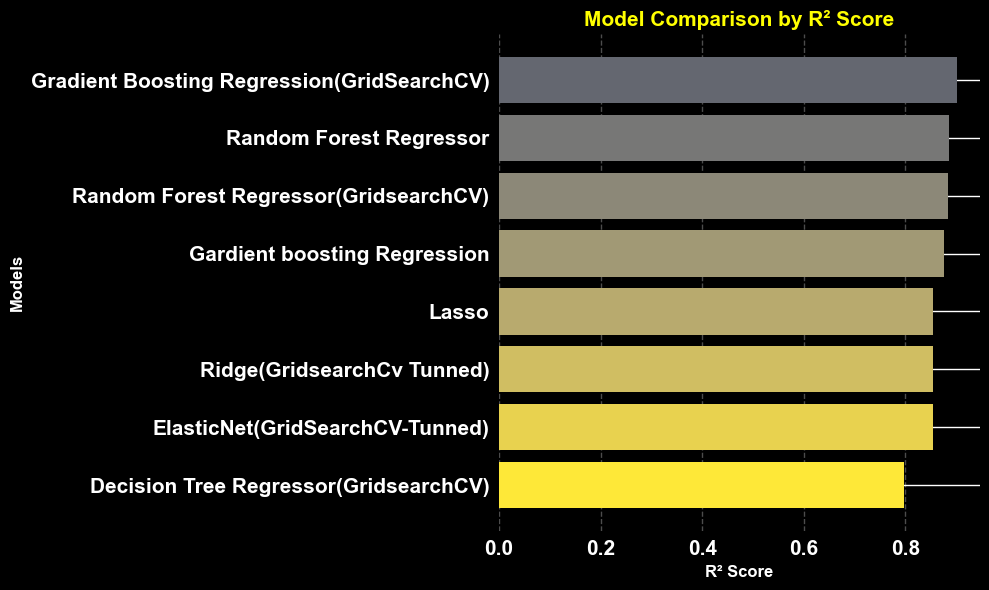

Saved plot at: plots\R2_Score_Comparison.png


In [133]:
plot_r2(test_results_df)